In [1]:
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import tensorflow
import keras
import numpy

In [2]:
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image

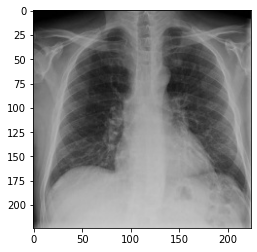

In [3]:
img = image.load_img('DATASETS/X-ray Images/TRAIN_DATA/COVID PATIENTS/covid_0.jpg')
plt.imshow(img)

In [4]:
img_array = plt.imread('DATASETS/X-ray Images/TRAIN_DATA/COVID PATIENTS/covid_0.jpg')
print(img_array)

[[[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [  0   0   0]
  [  2   2   2]
  [  8   8   8]]

 [[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [  0   0   0]
  [  2   2   2]
  [  8   8   8]]

 [[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [  0   0   0]
  [  2   2   2]
  [  7   7   7]]

 ...

 [[ 47  47  47]
  [ 63  63  63]
  [ 75  75  75]
  ...
  [151 151 151]
  [164 164 164]
  [179 179 179]]

 [[ 52  52  52]
  [ 67  67  67]
  [ 80  80  80]
  ...
  [154 154 154]
  [167 167 167]
  [181 181 181]]

 [[ 67  67  67]
  [ 79  79  79]
  [ 92  92  92]
  ...
  [157 157 157]
  [169 169 169]
  [183 183 183]]]


In [5]:
img_array.shape

(224, 224, 3)

In [6]:
train_data_gen = ImageDataGenerator()
test_data_gen = ImageDataGenerator()

In [7]:
train_genrator = train_data_gen.flow_from_directory('DATASETS/X-ray Images/TRAIN_DATA',target_size=(224,224),batch_size=10,class_mode="binary")

Found 162 images belonging to 2 classes.


In [8]:
train_genrator.class_indices

{'COVID PATIENTS': 0, 'NORMAL PATIENTS': 1}

In [9]:
validation_genrator = train_data_gen.flow_from_directory('DATASETS/X-ray Images/VALIDATION_DATA',target_size=(224,224),batch_size=10,class_mode="binary")

Found 78 images belonging to 2 classes.


In [10]:
validation_genrator.class_indices

{'COVID PATIENTS': 0, 'NORMAL PATIENTS': 1}

In [11]:
from keras.layers import Dense,Conv2D,Flatten,Dropout,MaxPooling2D
from keras.models import Sequential
from keras.optimizers import RMSprop
model = Sequential()

In [12]:
model.add(Conv2D(32,(3,3),input_shape=(224,224,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(512,activation = 'relu'))
model.add(Dense(1,activation = 'sigmoid'))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 26, 26, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 86528)             0

In [14]:
model.compile(loss='binary_crossentropy',optimizer=RMSprop(lr=1e-4),metrics=['acc'])

In [15]:
history = model.fit_generator(train_genrator,epochs=5,steps_per_epoch=16,validation_data=validation_genrator,validation_steps=7)

Epoch 1/5
16/16 [==============================] - 58s 3s/step - loss: 114.1136 - acc: 0.5877 - val_loss: 10.8770 - val_acc: 0.5143
Epoch 2/5
16/16 [==============================] - 25s 2s/step - loss: 8.3237 - acc: 0.6115 - val_loss: 3.4989 - val_acc: 0.6714
Epoch 3/5
16/16 [==============================] - 24s 1s/step - loss: 2.4148 - acc: 0.7265 - val_loss: 0.5540 - val_acc: 0.9000
Epoch 4/5
16/16 [==============================] - 24s 2s/step - loss: 1.0369 - acc: 0.7738 - val_loss: 0.6740 - val_acc: 0.8286
Epoch 5/5
16/16 [==============================] - 24s 2s/step - loss: 0.6551 - acc: 0.8996 - val_loss: 1.3819 - val_acc: 0.7714


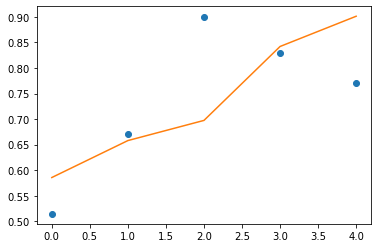

In [16]:
plt.plot(history.history['val_acc'],'o')
plt.plot(history.history["acc"],'-')

In [17]:
test_datagen = ImageDataGenerator()

In [18]:
test_dir = "DATASETS/X-ray Images/TEST_DATA"

In [19]:
test_generator = test_datagen.flow_from_directory(test_dir,target_size=(224, 224),batch_size=5,class_mode='binary')

Found 84 images belonging to 2 classes.


In [20]:
test_loss, test_acc = model.evaluate_generator(test_generator, steps=5)
print('TEST ACCURACY:', test_acc)

TEST ACCURACY: 0.8399999737739563
